In [1]:
import warnings
warnings.filterwarnings('ignore')
from operator import itemgetter
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import seaborn as sns #visualization
import json #exporting columns
import pickle #saving the model
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.linear_model import Lasso #Lasso Regression
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import GridSearchCV #Hyper parameter tuning
from warnings import simplefilter #Filtering warnings
import seaborn as sns
import missingno as msno
import seaborn as sns
from datetime import datetime
from scipy import stats

In [714]:
Orginal_data = pd.read_csv('./Combined2.csv',encoding = "ISO-8859-1")
Causes_data = pd.read_csv('./Causes2.csv',encoding = "ISO-8859-1")
Orginal_data.shape

(15977, 35)

In [715]:
Orginal_data2 = Orginal_data.drop_duplicates()
Orginal_data2.shape

(15977, 35)

In [716]:
Orginal_data.columns

Index(['Campaign Id*', 'Campaign Title', 'Receiving NPO Name*',
       'Receiving NPO Id*', 'NPO Status*',
       'Number of campaigns from the same NPO that started within the same Year Month',
       'Public Campaign Access*', 'Creator Type*', 'Creator Id*',
       'Campaign Status*', 'Actual Donation Amount', 'Distinct Donors',
       ' Campaign Goal ', 'Campaign Completion Rate', 'Days Left for Campaign',
       'Campaign Start Date', 'Campaign End Date',
       'NPO Ipc Status For Tax Deductibility', 'Campaign Image1 Id',
       'Campaign Image2 Id', 'Campaign Image3 Id', 'Campaign Image4 Id',
       'Campaign Image5 Id', 'Campaign Video', 'Impact Message 1',
       'Impact Message 2', 'Impact Message 3', 'Impact Message 4',
       'Impact Message 5', 'Custom Amount 1', 'Custom Amount 2',
       'Custom Amount 3', 'Custom Amount 4', 'Description of Campaign',
       'Description of NPO'],
      dtype='object')

In [717]:
combined_data = pd.merge(Orginal_data, Causes_data, how='left', on=['Campaign Id*'])

In [718]:
combined_data.shape

(15979, 69)

In [719]:
combined_data2  = combined_data.drop_duplicates()
combined_data2.shape

(15979, 69)

In [720]:
Org_causes = ['Org Cause Animal Welfare', 'Org Cause Arts & Heritage',
       'Org Cause Children & Youth', 'Org Cause Community',
       'Org Cause Disability', 'Org Cause Education', 'Org Cause Elderly',
       'Org Cause Environment', 'Org Cause Families', 'Org Cause Health',
       'Org Cause Humanitarian', 'Org Cause Social Service',
       'Org Cause Sports', 'Org Cause Women & Girls', 'Cam Cause Animal Welfare',
       ]
Cam_causes = ['Cam Cause Arts & Heritage', 'Cam Cause Children & Youth',
       'Cam Cause Community', 'Cam Cause Disability', 'Cam Cause Education',
       'Cam Cause Elderly', 'Cam Cause Environment', 'Cam Cause Families',
       'Cam Cause Health', 'Cam Cause Humanitarian',
       'Cam Cause Social Service', 'Cam Cause Sports',
       'Cam Cause Women & Girls']
Length_Org_causes = len(Org_causes)
Length_Cam_causes = len(Cam_causes)
combined_data['Org_causes'] = 0
combined_data['Cam_causes'] = 0
Total_Rows = combined_data.shape[0]
for j in range(Total_Rows):
    num_Org_causes = 0
    num_Cam_causes = 0
    for position1 in range(Length_Org_causes):
        num_Org_causes += 1 if not pd.isnull(combined_data[Org_causes[position1]].iloc[j]) else 0 #这里是在没有填充0的情况下的判断方式
    combined_data['Org_causes'].iloc[j] = num_Org_causes
    for position2 in range(Length_Cam_causes):
        num_Cam_causes += 1 if not pd.isnull(combined_data[Cam_causes[position2]].iloc[j]) else 0
    combined_data['Org_causes'].iloc[j] = num_Org_causes
    combined_data['Cam_causes'].iloc[j] = num_Cam_causes

In [721]:
combined_data

,Campaign Id*,Campaign Title_x,Receiving NPO Name*,Receiving NPO Id*,NPO Status*,Number of campaigns from the same NPO that started within the same Year Month,Public Campaign Access*,Creator Type*,Creator Id*,Campaign Status*,...,Cam Cause Social Service,Cam Cause Sports,Cam Cause Women & Girls,Pub Enquiry Person,Pub Enquiry Contact,Pub Enquiry Email,Web URL,Facebook Link,Org_causes,Cam_causes
0,4608063,World Suicide Prevention Day 2017,Samaritans of Singapore,3102869,True,1,1,NPO,3102869,ENDED,...,Social Service,NaN,NaN,Sandra Wee,6221 2122,comms@sos.org.sg,www.sos.org.sg,SamaritansofSingapore,4,2
1,4648574,Enabling Lives,SPD (formerly Society for the Physically Disab...,3105759,True,2,1,NPO,3105759,ENDED,...,NaN,NaN,NaN,Melissa Tan,6579 0794,melissa_tan@spd.org.sg,www.spd.org.sg,SPDSingapore,4,1
2,4661665,SPD Charity Hongbao 2017,SPD (formerly Society for the Physically Disab...,3105759,True,2,1,NPO,3105759,ENDED,...,NaN,NaN,NaN,Melissa Tan,6579 0794,melissa_tan@spd.org.sg,www.spd.org.sg,SPDSingapore,4,1
3,4716038,Sundown Run 2017 - Running 4 HFH,Habitat for Humanity Singapore Ltd,3706352,True,2,1,INDIVIDUAL,4614452,ENDED,...,Social Service,NaN,NaN,Habitat for Humanity Singapore,67447326,info@habitat.org.sg,www.habitat.org.sg,HabitatSG,4,4
4,4729527,Child For Child,Children's Cancer Foundation,3105049,False,2,1,INDIVIDUAL,4697816,ENDED,...,NaN,NaN,NaN,Fundraising Team,62293701,fundraising@ccf.org.sg,www.ccf.org.sg,sgccf,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15974,81620010,#EndowusGivesBack to Gardens by the Bay,Gardens by the Bay,44329126,True,2,1,Corporate,67580280,ACTIVE,...,NaN,NaN,NaN,Gardens by the Bay,64206848,feedback@gardensbythebay.com.sg,www.gardensbythebay.com.sg,gardensbythebay,4,4
15975,81633179,Support Loke Chui Yee in MAD Hike 2022,SingHealth Fund - SingHealth Polyclinics (SHP),63274874,True,5,1,INDIVIDUAL,63267540,ACTIVE,...,NaN,NaN,NaN,SingHealth Polyclinics Development Office,63507549,givingtoshp@singhealth.com.sg,Polyclinic.singhealth.com.sg,NaN,1,1
15976,81633303,Support Derek Tse in MAD Hike 2022,SingHealth Fund - SingHealth Polyclinics (SHP),63274874,True,5,1,INDIVIDUAL,63267540,ACTIVE,...,NaN,NaN,NaN,SingHealth Polyclinics Development Office,63507549,givingtoshp@singhealth.com.sg,Polyclinic.singhealth.com.sg,NaN,1,1
15977,81635547,WE@SG Trivia Night,Daughters Of Tomorrow Limited,3675791,True,4,1,INDIVIDUAL,81631190,ACTIVE,...,Social Service,NaN,Women & Girls,Jonathan Tan,81183663,donorrelations@DaughtersOfTomorrow.com,www.daughtersoftomorrow.org/,daughtersoftomorrow,3,3


<AxesSubplot: >

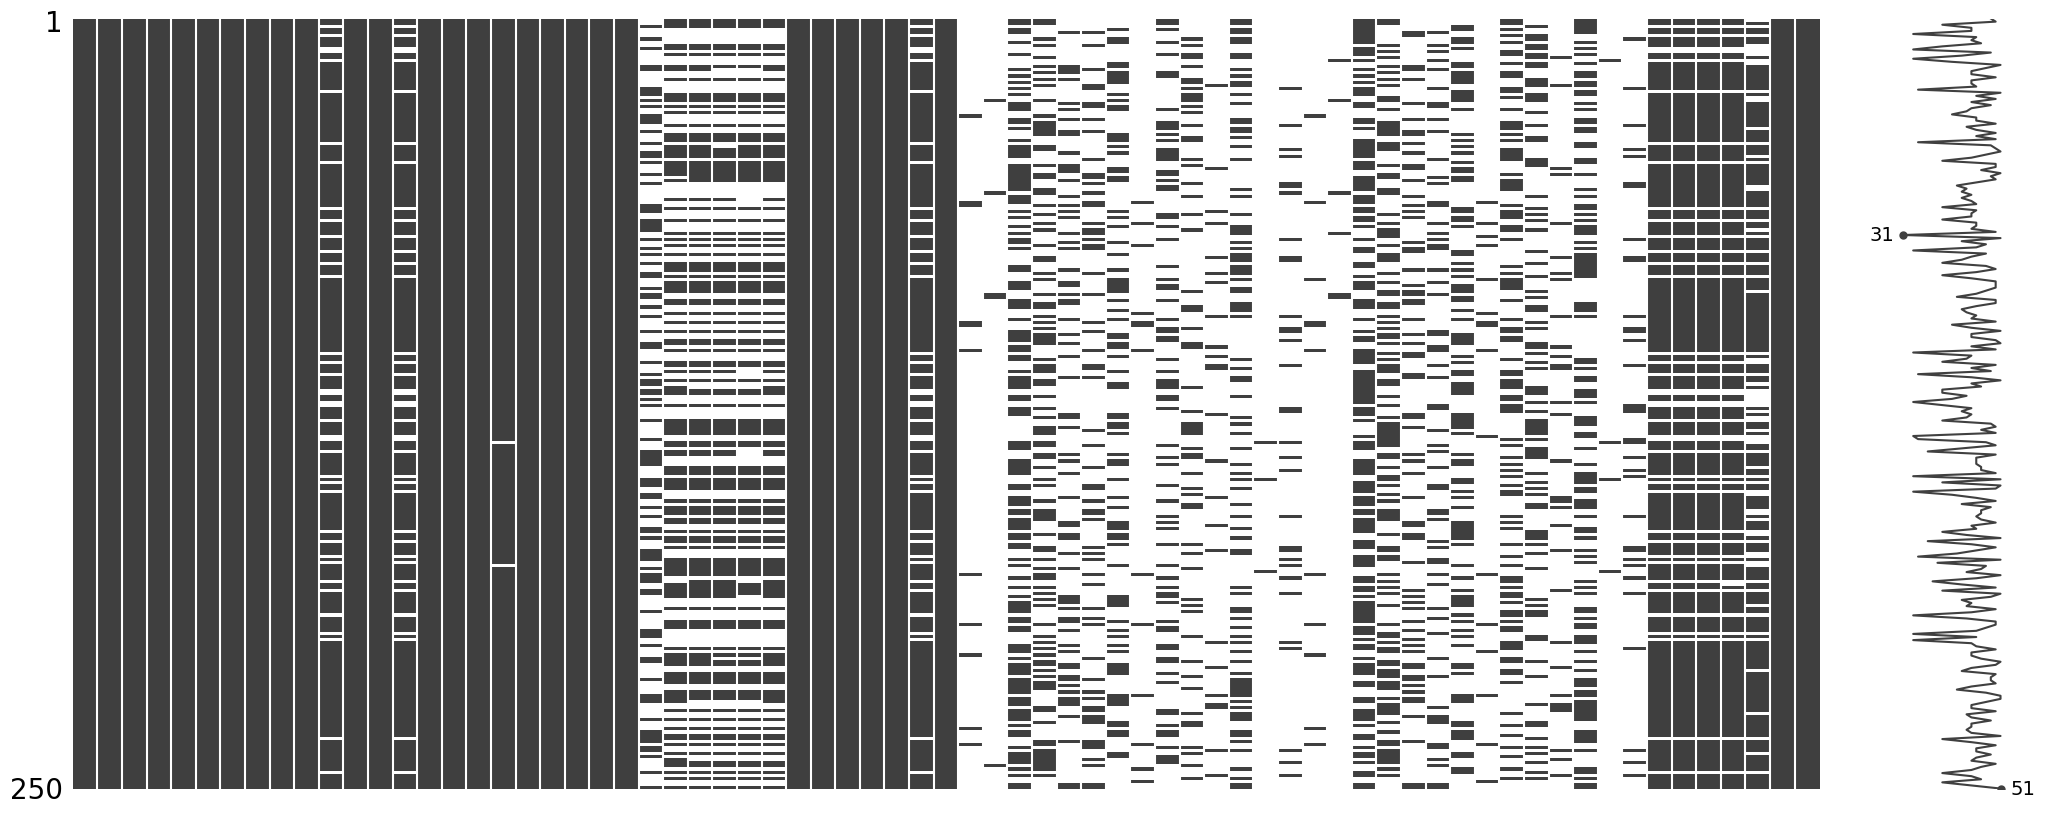

In [722]:
msno.matrix(combined_data.sample(250))

In [723]:
NPO_with_UEN = pd.read_csv('./part2_result.csv',encoding = "ISO-8859-1")

In [724]:
NPO_with_UEN

,S/N,Name of Organisation,Type,UEN,IPC Period,Sector,Classification,Activities,Scale_type
0,189,Samaritans of Singapore,Registered with IPC,S69SS0047D,From 01/4/2022 to 31/12/2024,Social and Welfare,"Community,Support Groups","Direct Services Public awareness, promotion & ...",10000000
1,238,SPD,Registered with IPC,S64SS0052D,From 01/1/2022 to 31/12/2025,Social and Welfare,"Disability (Adult),Disability (Children)","Direct Services Public awareness, promotion & ...",20000000
2,339,HABITAT FOR HUMANITY SINGAPORE LTD,Registered with IPC,200201617W,From 09/3/2023 to 08/3/2025,Others,General Charitable Purposes,"Direct Services Public awareness, promotion & ...",5000000
3,45,CHILDREN'S CANCER FOUNDATION,Registered with IPC,201934434R,From 05/5/2022 to 04/5/2025,Health,Diseases/Illnessess Support Group,"Direct Services Public awareness, promotion & ...",20000000
4,433,Zonta Singapore- Project Pari Fund,Registered with IPC,T10CC0004L,From 01/5/2021 to 31/1/2024,Social and Welfare,Community,"Financial assistance, bursaries & scholarships",250000
...,...,...,...,...,...,...,...,...,...
553,8,ACMI Migrant Fund,Registered with IPC,T16CC0006L,From 04/9/2022 to 03/4/2024,Social and Welfare,"Community,Support Groups","Direct Services Public awareness, promotion & ...",1000000
554,92,INTERNATIONAL COMMUNITY SCHOOL (SINGAPORE) LTD,Registered,199303918N,Not Applicable,Education,Foreign Educational Institutions/Funds,Training & education,20000000
555,556,PEOPLE'S ASSOCIATION COMMUNITY DEVELOPMENT FUND,Exempt Charity with IPC,T07CC3011L,From 01/6/2022 to 31/5/2027,Community,"Central,North East,North West,South East,South...","Public awareness, promotion & advisory",5000000
556,162,"Federation of Youth Clubs, Singapore",Registered,S62SS0052E,Not Applicable,Others,Children/Youth,Direct Services Supports other Charities,50000


In [725]:
combined_data.shape

(15979, 71)

In [726]:
NPO_with_UEN.shape

(558, 9)

In [727]:
NPO_with_UEN.drop_duplicates()

,S/N,Name of Organisation,Type,UEN,IPC Period,Sector,Classification,Activities,Scale_type
0,189,Samaritans of Singapore,Registered with IPC,S69SS0047D,From 01/4/2022 to 31/12/2024,Social and Welfare,"Community,Support Groups","Direct Services Public awareness, promotion & ...",10000000
1,238,SPD,Registered with IPC,S64SS0052D,From 01/1/2022 to 31/12/2025,Social and Welfare,"Disability (Adult),Disability (Children)","Direct Services Public awareness, promotion & ...",20000000
2,339,HABITAT FOR HUMANITY SINGAPORE LTD,Registered with IPC,200201617W,From 09/3/2023 to 08/3/2025,Others,General Charitable Purposes,"Direct Services Public awareness, promotion & ...",5000000
3,45,CHILDREN'S CANCER FOUNDATION,Registered with IPC,201934434R,From 05/5/2022 to 04/5/2025,Health,Diseases/Illnessess Support Group,"Direct Services Public awareness, promotion & ...",20000000
4,433,Zonta Singapore- Project Pari Fund,Registered with IPC,T10CC0004L,From 01/5/2021 to 31/1/2024,Social and Welfare,Community,"Financial assistance, bursaries & scholarships",250000
...,...,...,...,...,...,...,...,...,...
553,8,ACMI Migrant Fund,Registered with IPC,T16CC0006L,From 04/9/2022 to 03/4/2024,Social and Welfare,"Community,Support Groups","Direct Services Public awareness, promotion & ...",1000000
554,92,INTERNATIONAL COMMUNITY SCHOOL (SINGAPORE) LTD,Registered,199303918N,Not Applicable,Education,Foreign Educational Institutions/Funds,Training & education,20000000
555,556,PEOPLE'S ASSOCIATION COMMUNITY DEVELOPMENT FUND,Exempt Charity with IPC,T07CC3011L,From 01/6/2022 to 31/5/2027,Community,"Central,North East,North West,South East,South...","Public awareness, promotion & advisory",5000000
556,162,"Federation of Youth Clubs, Singapore",Registered,S62SS0052E,Not Applicable,Others,Children/Youth,Direct Services Supports other Charities,50000


先把UEN的那部分取出来

In [740]:
'''
这里是用来生成没有删除的数据，用来对比之前的model结果和这次新的数据处理结果
Final_data = combined_data
NPO_with_UEN = NPO_with_UEN.rename(columns={'Name of Organisation':'Receiving NPO Name*'})
'''

In [729]:

Final_data = pd.DataFrame();
Unqualified_data = combined_data
list = NPO_with_UEN['Name of Organisation']
for i in list:
    Final_data =Final_data.append(combined_data[combined_data['Receiving NPO Name*'].str.lower()==i.lower()])
    Unqualified_data = Unqualified_data.drop(Unqualified_data[Unqualified_data['Receiving NPO Name*'].str.lower()==i.lower()].index)
    #print(len(combined_scale[combined_scale['UEN']==i]))
Final_data = Final_data.reset_index(drop = True)
NPO_with_UEN = NPO_with_UEN.rename(columns={'Name of Organisation':'Receiving NPO Name*'})
Final_data


"\nFinal_data = pd.DataFrame();\nUnqualified_data = combined_data\nlist = NPO_with_UEN['Name of Organisation']\nfor i in list:\n    Final_data =Final_data.append(combined_data[combined_data['Receiving NPO Name*'].str.lower()==i.lower()])\n    Unqualified_data = Unqualified_data.drop(Unqualified_data[Unqualified_data['Receiving NPO Name*'].str.lower()==i.lower()].index)\n    #print(len(combined_scale[combined_scale['UEN']==i]))\nFinal_data = Final_data.reset_index(drop = True)\nNPO_with_UEN = NPO_with_UEN.rename(columns={'Name of Organisation':'Receiving NPO Name*'})\nFinal_data\n"

In [730]:
Final_data.shape

(15979, 71)

In [731]:
Final_data2 = Final_data.drop_duplicates()
Final_data2.shape

(15979, 71)

In [732]:
Unqualified_data.shape

(5840, 71)

In [733]:
Unqualified_data.to_csv('part3_unqualified_data.csv.csv', index=None)


In [734]:
Final_data.shape

(15979, 71)

In [735]:
11190+4789

15979

In [736]:
for index, row in Final_data.iteritems():
    

    print(row)

0         4608063
1         4648574
2         4661665
3         4716038
4         4729527
           ...   
15974    81620010
15975    81633179
15976    81633303
15977    81635547
15978    81713338
Name: Campaign Id*, Length: 15979, dtype: int64
0                     World Suicide Prevention Day 2017
1                                        Enabling Lives
2                              SPD Charity Hongbao 2017
3                      Sundown Run 2017 - Running 4 HFH
4                                       Child For Child
                              ...                      
15974           #EndowusGivesBack to Gardens by the Bay
15975            Support Loke Chui Yee in MAD Hike 2022
15976                Support Derek Tse in MAD Hike 2022
15977                                WE@SG Trivia Night
15978    RLA Day 2022 - Supporting the Disability Cause
Name: Campaign Title_x, Length: 15979, dtype: object
0                                  Samaritans of Singapore
1        SPD (formerly Soc

In [741]:
# 全部转成小写拼接
Final_data['Receiving NPO Name*'] = Final_data['Receiving NPO Name*'].str.upper()
NPO_with_UEN['Receiving NPO Name*'] = NPO_with_UEN['Receiving NPO Name*'].str.upper()
Final_data.shape

(15979, 71)

In [ ]:
Final_data_test = Final_data.drop_duplicates()
Final_data_test.shape

(10139, 71)

In [ ]:
NPO_with_UEN

,S/N,Receiving NPO Name*,Type,UEN,IPC Period,Sector,Classification,Activities,Scale_type
0,189,SAMARITANS OF SINGAPORE,Registered with IPC,S69SS0047D,From 01/4/2022 to 31/12/2024,Social and Welfare,"Community,Support Groups","Direct Services Public awareness, promotion & ...",10000000
1,238,SPD,Registered with IPC,S64SS0052D,From 01/1/2022 to 31/12/2025,Social and Welfare,"Disability (Adult),Disability (Children)","Direct Services Public awareness, promotion & ...",20000000
2,339,HABITAT FOR HUMANITY SINGAPORE LTD,Registered with IPC,200201617W,From 09/3/2023 to 08/3/2025,Others,General Charitable Purposes,"Direct Services Public awareness, promotion & ...",5000000
3,45,CHILDREN'S CANCER FOUNDATION,Registered with IPC,201934434R,From 05/5/2022 to 04/5/2025,Health,Diseases/Illnessess Support Group,"Direct Services Public awareness, promotion & ...",20000000
4,433,ZONTA SINGAPORE- PROJECT PARI FUND,Registered with IPC,T10CC0004L,From 01/5/2021 to 31/1/2024,Social and Welfare,Community,"Financial assistance, bursaries & scholarships",250000
...,...,...,...,...,...,...,...,...,...
553,8,ACMI MIGRANT FUND,Registered with IPC,T16CC0006L,From 04/9/2022 to 03/4/2024,Social and Welfare,"Community,Support Groups","Direct Services Public awareness, promotion & ...",1000000
554,92,INTERNATIONAL COMMUNITY SCHOOL (SINGAPORE) LTD,Registered,199303918N,Not Applicable,Education,Foreign Educational Institutions/Funds,Training & education,20000000
555,556,PEOPLE'S ASSOCIATION COMMUNITY DEVELOPMENT FUND,Exempt Charity with IPC,T07CC3011L,From 01/6/2022 to 31/5/2027,Community,"Central,North East,North West,South East,South...","Public awareness, promotion & advisory",5000000
556,162,"FEDERATION OF YOUTH CLUBS, SINGAPORE",Registered,S62SS0052E,Not Applicable,Others,Children/Youth,Direct Services Supports other Charities,50000


In [ ]:
Final_data.to_csv('Final_data.csv', index=None)

In [ ]:
Final_data.shape

(10139, 71)

In [742]:
Final_data_res = pd.merge(Final_data, NPO_with_UEN, on='Receiving NPO Name*', how='left')

Final_data_res.shape


(15979, 79)

In [743]:
Final_data_res = Final_data_res.drop_duplicates()
Final_data_res.shape

(15979, 79)

In [744]:
Final_data_res.to_csv('part3_result.csv', index=None)

In [ ]:
def same_element(list1,list2):
    set1 = set(list1)
    set2 = set(list2)
    return (set1 & set2),(set1 ^ set2),((set1|set2)-set2),((set1|set2)-set1)

In [ ]:
same,dif,alone_forward,alone_backward = same_element(Unqualified_data['Receiving NPO Name*'], NPO_with_UEN['Receiving NPO Name*'])
print('The same items number：',len(same),  '\nThe same items list:',same)
print('The different items number：',len(dif), '\nThe different items list:',dif)
print('列表1有列表2没有的元素：',alone_forward,'列表1有列表2没有的元素个数：',len(alone_forward))
print('列表1没有列表2有的元素：',alone_backward,'列表1没有列表2有的元素个数：',len(alone_backward))

The same items number： 0 
The same items list: set()
The different items number： 780 
The different items list: {'Inspiring Girls SG Ltd.', 'FOCUS ON THE FAMILY SINGAPORE LIMITED', 'DANCE ENSEMBLE SINGAPORE LTD', 'GLYPH COMMUNITY LIMITED', 'Social Creatives', 'EPWORTH COMMUNITY SERVICES', 'NATIONAL HEALTHCARE GROUP FUND', 'Chowk Productions Ltd', 'LEUKEMIA AND LYMPHOMA FOUNDATION', "Singapore Council of Women's Organisations - Service Fund", 'COMPASSION FUND LTD.', 'FAMILY LIFE FIRST', 'CR59_App1_Foundation', 'Beautiful People SG Ltd', 'NeuGen Fund', 'RISE COMMUNITY LIMITED', '#NAME?', 'T.H.E DANCE COMPANY LTD.', 'MERCY RELIEF LIMITED', 'COUNSELLING AND CARE CENTRE', 'ACMI MIGRANT FUND', 'SINGAPORE SILAT FEDERATION', 'PERSATUAN PERSURATAN PEMUDA PEMUDI MELAYU (MALAY YOUTH LITERARY ASSOCIATION)', 'SINGAPORE BOOK COUNCIL LIMITED', 'Metropolitan YMCA Singapore', 'THE GREENHOUSE COMMUNITY SERVICES LTD.', 'Bizlink Centre (S) Ltd', 'Drama Box', 'SHARED SERVICES FOR CHARITIES LIMITED', 'HEB-A

In [ ]:
Need_variable = ["Receiving_NPO_name", "Actual_Donation_Amount","NPO_Tax_Deductibility", "Distinct_Donors",
"Campaign_Goal","Campaign_Start_Date", "Campaign_End_Date", 
"Campaign_Image1", "Campaign_Image2","Campaign_Image3",
"Campaign_Image4","Campaign_Image5","Campaign_Video",
"Impact_Message1","Impact_Message2","Impact_Message3","Impact_Message4",
"Impact_Message5","Custom_Amount1","Custom_Amount2","Custom_Amount3",
"Custom_Amount4","Description_Campaign","Description_NPO",
'Org_Cause_Animal_Welfare', 'Org_Cause_Arts_Heritage',
'Org_Cause_Children_Youth', 'Org_Cause_Community',
'Org_Cause_Disability', 'Org_Cause_Education', 'Org_Cause_Elderly',
'Org_Cause_Environment', 'Org_Cause_Families', 'Org_Cause_Health',
'Org_Cause_Humanitarian', 'Org_Cause_Social Service',
'Org_Cause_Sports', 'Org_Cause_Women_Girls', 'Cam_Cause_Animal_Welfare',
'Cam_Cause_Arts_Heritage', 'Cam_Cause_Children_Youth',
'Cam_Cause_Community', 'Cam_Cause_Disability', 'Cam_Cause_Education',
'Cam_Cause_Elderly', 'Cam_Cause_Environment', 'Cam_Cause_Families',
'Cam_Cause_Health', 'Cam_Cause_Humanitarian',
'Cam_Cause_Social_Service', 'Cam_Cause_Sports', 'Cam_Cause_Women_Girls'
]

#extract_data = combined_data[Need_variable]
#extract_data







#msno.matrix(combined_data.sample(250))
#Causes_data= Causes_data.fillna(0)
#msno.matrix(Causes_data.sample(250))
#msno.matrix(Causes_data.sample(250))

#Orginal_data['NPO_Tax_Deductibility'] = Orginal_data['NPO_Tax_Deductibility'].fillna('0')
#Orginal_data['Actual_Donation_Amount'] = Orginal_data['Actual_Donation_Amount'].fillna('0')
#Orginal_data['Actual_Donation_Amount'] = pd.to_numeric( Orginal_data['Actual_Donation_Amount'])
#Orginal_data['Distinct_Donors'] = Orginal_data['Distinct_Donors'].fillna('0')
#Orginal_data['Distinct_Donors'] = pd.to_numeric( Orginal_data['Distinct_Donors'])
#Orginal_data['Campaign_Video'] = Orginal_data['Campaign_Video'].fillna('0')
#Orginal_data['Impact_Message1'] = Orginal_data['Impact_Message1'].fillna('0')
#Orginal_data['Impact_Message2'] = Orginal_data['Impact_Message2'].fillna('0')
#Orginal_data['Impact_Message3'] = Orginal_data['Impact_Message3'].fillna('0')
#Orginal_data['Impact_Message4'] = Orginal_data['Impact_Message4'].fillna('0')
#Orginal_data['Impact_Message5'] = Orginal_data['Impact_Message5'].fillna('0')
#Orginal_data['Description_NPO'] = Orginal_data['Description_NPO'].fillna('0')

#msno.matrix(Orginal_data.sample(250))

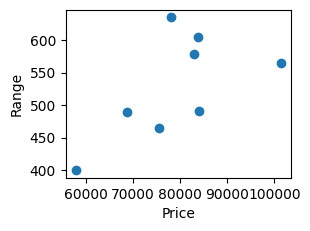

In [3]:
lable = ['EC7',	'EC7 Plus',	'ES8',	'ES8 Plus',	'VF8',	'VF9',	'Model X',	'BMW iX3']
x =[68800,	78000,	75500,	83800,	57950,	83000,	101380,	84100]
y = [490,	635,	465,	605,	400,	579,	565,	491]


plt.subplot(221)
plt.scatter(x, y,xytext = (x[i]+0.1, y[i]+0.1))
plt.xlabel('Price'); plt.ylabel('Range')
plt.show()


In [5]:
245*1.6

392.0

In [6]:
9255376000000VND million /10500472

0.881424758810842